In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=63cb6abc27f502e2a41c9d388fc6c7e728a02feda7e5e7572129613d53585dd7
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

from fitter import Fitter, get_common_distributions, get_distributions

In [17]:
df = pd.read_csv("/content/drive/Shareddrives/시뮬레이션 팀플/data/충전 data.csv")
df =df[df['충전기구분']=='급속']

In [18]:
df['time']=df['충전시간']*60+df['충전분']

In [19]:
df= df.reset_index()

In [20]:
df=df[['충전기구분','충전용량','충전량','충전종료일자','충전시작시각','충전종료시각','time']]

In [21]:
df= df.drop(df[df['time']==0].index)

In [22]:
df

,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time
0,급속,50,2.30,2022.1.1,2022.1.1 19:23,2022.1.1 19:37,14
1,급속,50,44.94,2022.1.1,2022.1.1 21:09,2022.1.1 22:03,53
2,급속,50,10.05,2022.1.1,2022.1.1 21:11,2022.1.1 21:24,12
3,급속,50,4.53,2022.1.1,2022.1.1 21:01,2022.1.1 21:08,6
4,급속,50,50.98,2022.1.1,2022.1.1 19:44,2022.1.1 20:51,67
...,...,...,...,...,...,...,...
1980,급속,50,19.97,2022.3.30,2022.3.30 10:33,2022.3.30 11:39,66
1981,급속,50,56.45,2022.3.30,2022.3.30 13:52,2022.3.30 15:13,81
1982,급속,50,14.15,2022.3.30,2022.3.30 19:38,2022.3.30 20:16,37
1983,급속,50,6.55,2022.3.30,2022.3.30 18:55,2022.3.30 19:17,21


In [23]:
df= df.reset_index()

In [24]:
df['충전시작일자']= [i[:-5].strip() for i in df['충전시작시각']] #월이랑 날짜만 남게 

In [25]:
from datetime import datetime 

df['weekday']= ''
for i in range(len(df)):
    datetime_format = "%Y.%m.%d %H:%M"
    datetime_result = datetime.strptime(df['충전시작시각'][i], datetime_format)
    df['충전시작시각'][i]= datetime_result
    if datetime_result.weekday() < 4:  #주중
        df['weekday'][i]= 1
    else:                              #주말
        df['weekday'][i]= 0

In [26]:
df

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,0,급속,50,2.30,2022.1.1,2022-01-01 19:23:00,2022.1.1 19:37,14,2022.1.1,0
1,1,급속,50,44.94,2022.1.1,2022-01-01 21:09:00,2022.1.1 22:03,53,2022.1.1,0
2,2,급속,50,10.05,2022.1.1,2022-01-01 21:11:00,2022.1.1 21:24,12,2022.1.1,0
3,3,급속,50,4.53,2022.1.1,2022-01-01 21:01:00,2022.1.1 21:08,6,2022.1.1,0
4,4,급속,50,50.98,2022.1.1,2022-01-01 19:44:00,2022.1.1 20:51,67,2022.1.1,0
...,...,...,...,...,...,...,...,...,...,...
1955,1980,급속,50,19.97,2022.3.30,2022-03-30 10:33:00,2022.3.30 11:39,66,2022.3.30,1
1956,1981,급속,50,56.45,2022.3.30,2022-03-30 13:52:00,2022.3.30 15:13,81,2022.3.30,1
1957,1982,급속,50,14.15,2022.3.30,2022-03-30 19:38:00,2022.3.30 20:16,37,2022.3.30,1
1958,1983,급속,50,6.55,2022.3.30,2022-03-30 18:55:00,2022.3.30 19:17,21,2022.3.30,1


In [27]:
df['충전시작일자'] = pd.to_datetime(df['충전시작일자'])
df.loc[(df["충전시작일자"] == datetime(2022,1,31))|(df["충전시작일자"] == datetime(2022,2,1))|(df["충전시작일자"] == datetime(2022,2,2))|(df["충전시작일자"] == datetime(2022,3,1)),'weekday'] = 0
#설연휴, 3.1절은 공휴일로 분류

In [28]:
week= df[df['weekday']==1]
hol = df[df['weekday']==0]


week= week.reset_index(drop=True)
hol = hol.reset_index(drop=True)

In [29]:
week

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,60,급속,50,33.45,2022.1.3,2022-01-03 21:25:00,2022.1.3 22:15,50,2022-01-03,1
1,61,급속,50,62.65,2022.1.3,2022-01-03 21:30:00,2022.1.3 22:49,78,2022-01-03,1
2,62,급속,50,21.75,2022.1.3,2022-01-03 15:51:00,2022.1.3 16:30,39,2022-01-03,1
3,63,급속,50,33.53,2022.1.3,2022-01-03 15:20:00,2022.1.3 17:02,102,2022-01-03,1
4,64,급속,50,22.11,2022.1.3,2022-01-03 15:52:00,2022.1.3 17:38,105,2022-01-03,1
...,...,...,...,...,...,...,...,...,...,...
892,1980,급속,50,19.97,2022.3.30,2022-03-30 10:33:00,2022.3.30 11:39,66,2022-03-30,1
893,1981,급속,50,56.45,2022.3.30,2022-03-30 13:52:00,2022.3.30 15:13,81,2022-03-30,1
894,1982,급속,50,14.15,2022.3.30,2022-03-30 19:38:00,2022.3.30 20:16,37,2022-03-30,1
895,1983,급속,50,6.55,2022.3.30,2022-03-30 18:55:00,2022.3.30 19:17,21,2022-03-30,1


In [30]:
hol

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,0,급속,50,2.30,2022.1.1,2022-01-01 19:23:00,2022.1.1 19:37,14,2022-01-01,0
1,1,급속,50,44.94,2022.1.1,2022-01-01 21:09:00,2022.1.1 22:03,53,2022-01-01,0
2,2,급속,50,10.05,2022.1.1,2022-01-01 21:11:00,2022.1.1 21:24,12,2022-01-01,0
3,3,급속,50,4.53,2022.1.1,2022-01-01 21:01:00,2022.1.1 21:08,6,2022-01-01,0
4,4,급속,50,50.98,2022.1.1,2022-01-01 19:44:00,2022.1.1 20:51,67,2022-01-01,0
...,...,...,...,...,...,...,...,...,...,...
1058,1933,급속,50,23.90,2022.3.27,2022-03-27 15:17:00,2022.3.27 16:15,58,2022-03-27,0
1059,1934,급속,50,28.24,2022.3.27,2022-03-27 16:36:00,2022.3.27 17:17,41,2022-03-27,0
1060,1935,급속,50,4.96,2022.3.27,2022-03-27 12:12:00,2022.3.27 13:09,56,2022-03-27,0
1061,1936,급속,50,43.21,2022.3.27,2022-03-27 13:57:00,2022.3.27 15:00,62,2022-03-27,0


#시간나누는부분

In [59]:
def timezone(df):

    df['timezone']=''

    for i in range(len(df)):

        if  df['충전시작시각'][i] >= df['충전시작시각'][i].replace(hour=6, minute=0, second=0, microsecond=0) and df['충전시작시각'][i] <= df['충전시작시각'][i].replace(hour=18, minute=0, second=0, microsecond=0):
            df['timezone'][i]=1
        else:
            df['timezone'][i]=2

In [60]:
timezone(week)

In [61]:
week1= week[week['timezone']==1]
week2= week[week['timezone']==2]

In [62]:
timezone(hol)

In [63]:
hol1= hol[hol['timezone']==1]
hol2= hol[hol['timezone']==2]

# 데이터 설명

2022.1.1 부터 2022.03.30일까지의 서울 용산역 아이파크몰 전기차 충전소의 완속충전기 데이터 사용 <br>(1536개 데이터, 완속충전기의 대수 : 11대)

평균 충전시간 127.63분, 표준편차 96.66분

In [ ]:
len(df['충전기'].unique())

In [14]:
df.describe()

NameError: ignored

# 통계적 분포 추정

# Step 1. Homogeneity Check
3달간 수집된 데이터가 동질성을 갖는가? <br>
검증결과가 동일할 경우에만 데이터를 하나로 합쳐 적당한 분포에 fitting 시킬 수 있다

H0: 1월, 2월, 3월달의 service time 분포가 모두 동일하다 <br>
H1: 1월, 2월, 3월달의 service time 분포가 모두 동일하지 않다(적어도 한개 이상이 다르다)

비모수 검정은 아래와 같은 조건을 만족할 때 실시한다.

1. 정규성 불만족
2. 작은 샘플 사이즈
3. 순위로만 된 데이터

2,3의 경우에는 비모수 검정을 실시해야 한다.<br>
1의 경우에는 이상치 제거, 결측치 변환등을 통하여 정규성을 만족하면 모수 검정 <br>
이상치 제거, 결측치 변환등을 실시하였는데에도 정규성을 만족하지 않으면 비모수 검정을 실시하게 된다.

그 중에서 more than 3 samples에 대해선 모수 검정으로는 ANOVA, 비모수 검정으로는 kruskal-wallis test을 사용한다

### 주중, 주말 다른지 체크

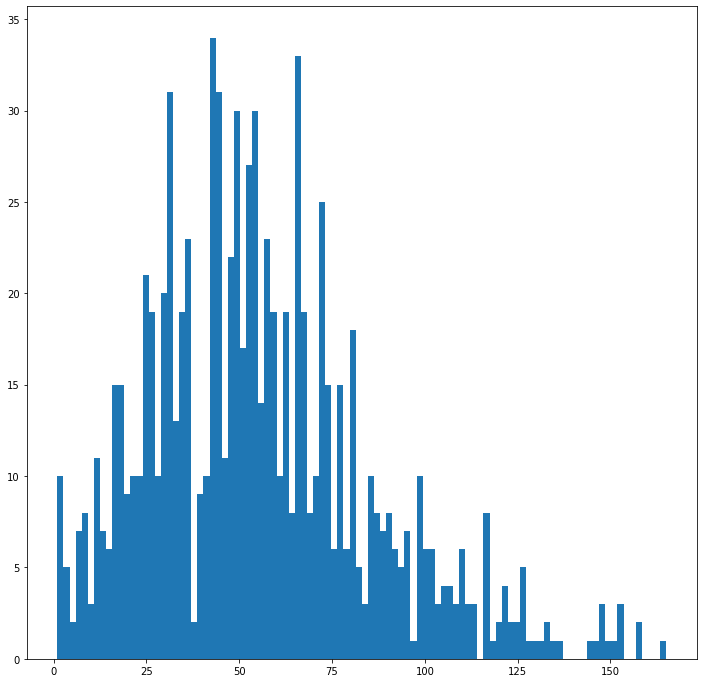

In [36]:
plt.figure(figsize=(12,12))
p = plt.hist(week['time'],bins=100)

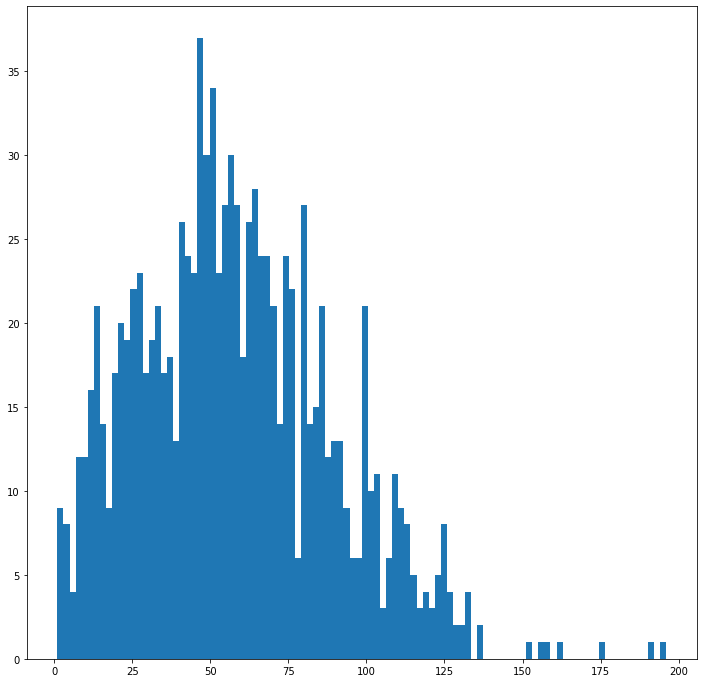

In [37]:
plt.figure(figsize=(12,12))
p = plt.hist(hol['time'],bins=100)

In [38]:
from scipy.stats import kruskal

print(kruskal(week['time'],hol['time']))

KruskalResult(statistic=3.7837872487769597, pvalue=0.051751400192346836)


피밸류 0.05라서 애매함

### 시간대 별로 체크

In [42]:
week2

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday,timezone
0,60,급속,50,33.45,2022.1.3,2022-01-03 21:25:00,2022.1.3 22:15,50,2022-01-03,1,2
1,61,급속,50,62.65,2022.1.3,2022-01-03 21:30:00,2022.1.3 22:49,78,2022-01-03,1,2
5,65,급속,50,15.40,2022.1.3,2022-01-03 18:48:00,2022.1.3 19:34,46,2022-01-03,1,2
6,66,급속,50,30.98,2022.1.3,2022-01-03 19:52:00,2022.1.3 21:10,78,2022-01-03,1,2
7,67,급속,50,39.30,2022.1.3,2022-01-03 19:14:00,2022.1.3 20:28,74,2022-01-03,1,2
...,...,...,...,...,...,...,...,...,...,...,...
884,1972,급속,50,39.01,2022.3.29,2022-03-29 22:26:00,2022.3.29 23:17,51,2022-03-29,1,2
891,1979,급속,50,22.61,2022.3.30,2022-03-30 18:15:00,2022.3.30 19:15,60,2022-03-30,1,2
894,1982,급속,50,14.15,2022.3.30,2022-03-30 19:38:00,2022.3.30 20:16,37,2022-03-30,1,2
895,1983,급속,50,6.55,2022.3.30,2022-03-30 18:55:00,2022.3.30 19:17,21,2022-03-30,1,2


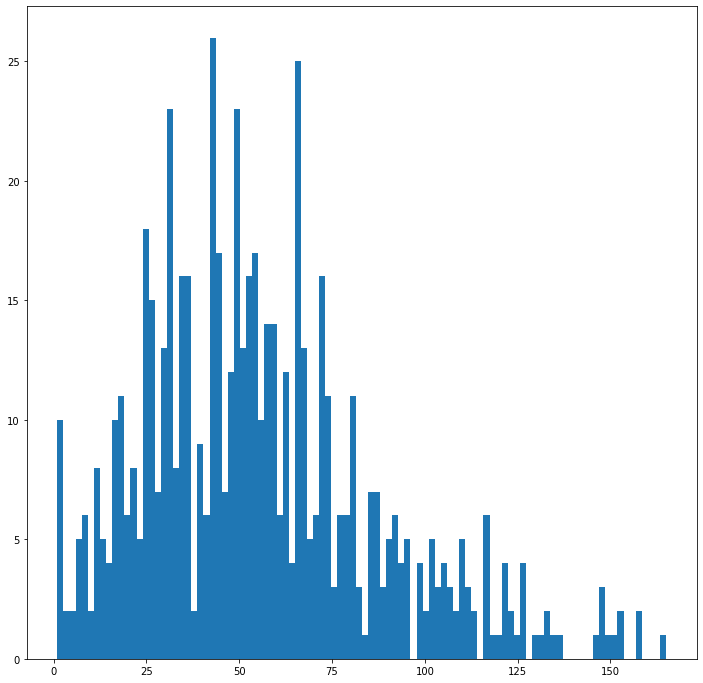

In [70]:
plt.figure(figsize=(12,12))
p = plt.hist(week1['time'],bins=100)

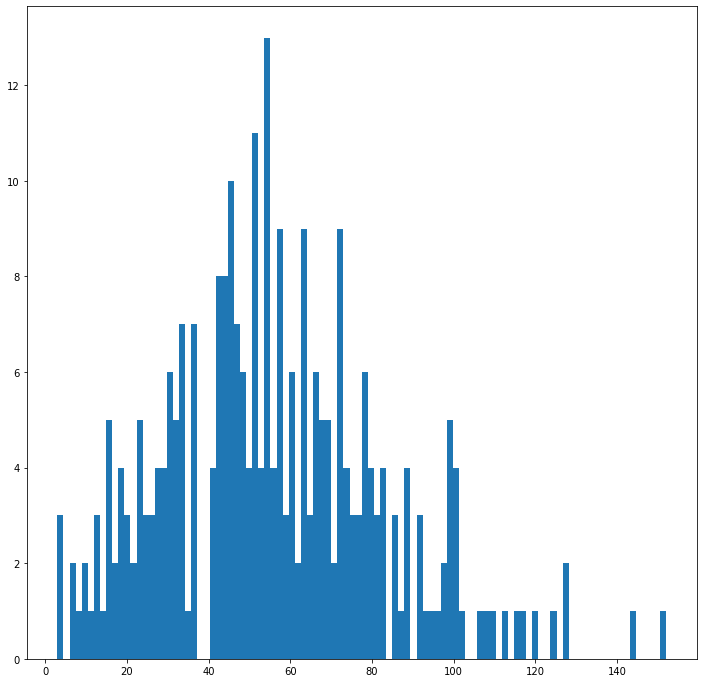

In [71]:
plt.figure(figsize=(12,12))
p = plt.hist(week2['time'],bins=100)

In [72]:
print(kruskal(week1['time'],week2['time']))

KruskalResult(statistic=0.8909146909873659, pvalue=0.34522955567226343)


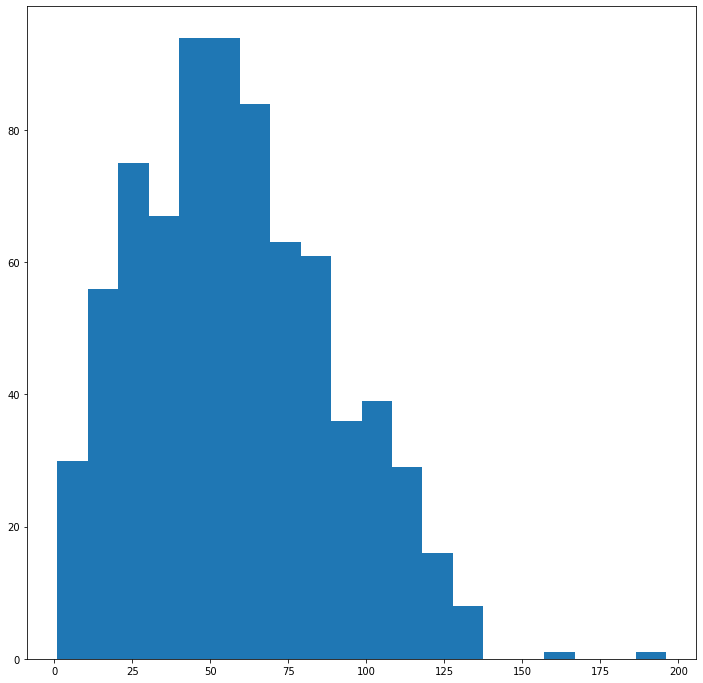

In [73]:
plt.figure(figsize=(12,12))
p = plt.hist(hol1['time'],bins=20)

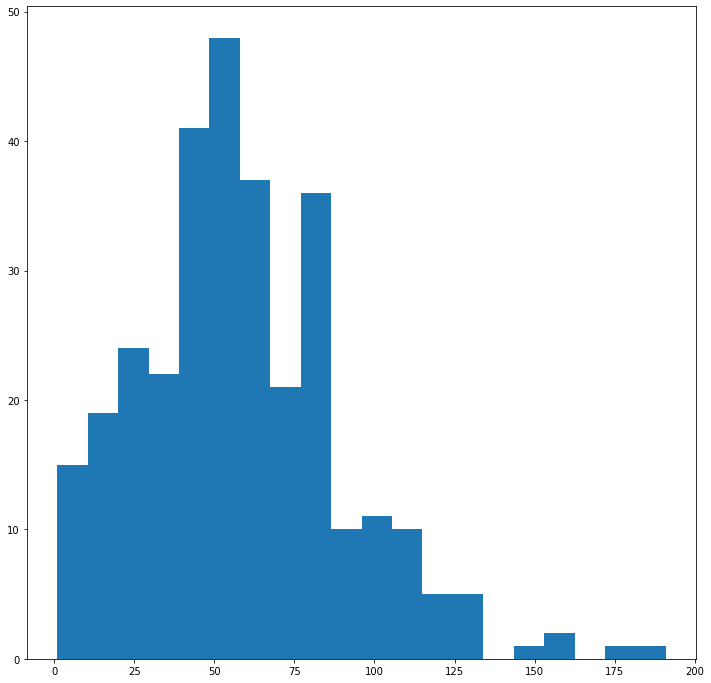

In [74]:
plt.figure(figsize=(12,12))
p = plt.hist(hol2['time'],bins=20)

In [75]:
print(kruskal(hol1['time'],hol2['time']))

KruskalResult(statistic=0.0022171083697301976, pvalue=0.9624445416908228)


시간대 


### 1,2,3월 체크

In [ ]:
from datetime import datetime

#1월 (충전종료일자으로 분류)
df["충전종료일자"]=pd.to_datetime(df["충전종료일자"]) 
df_jan = df.loc[(df["충전종료일자"]>= datetime(2022,1,1)) & (df["충전종료일자"] < datetime(2022,2,1)),:]
df_feb = df.loc[(df["충전종료일자"]>= datetime(2022,2,1)) & (df["충전종료일자"] < datetime(2022,3,1)),:]
df_mar = df.loc[(df["충전종료일자"]>= datetime(2022,3,1)) & (df["충전종료일자"] < datetime(2022,4,1)),:]

In [ ]:
df_jan.shape, df_feb.shape, df_mar.shape

((783, 10), (639, 10), (538, 10))

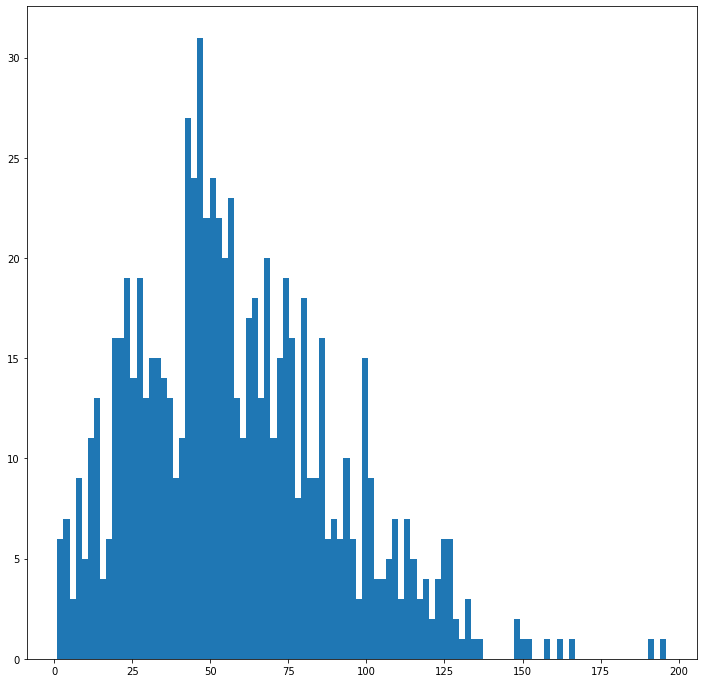

In [ ]:
#1월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_jan['time'],bins=100)

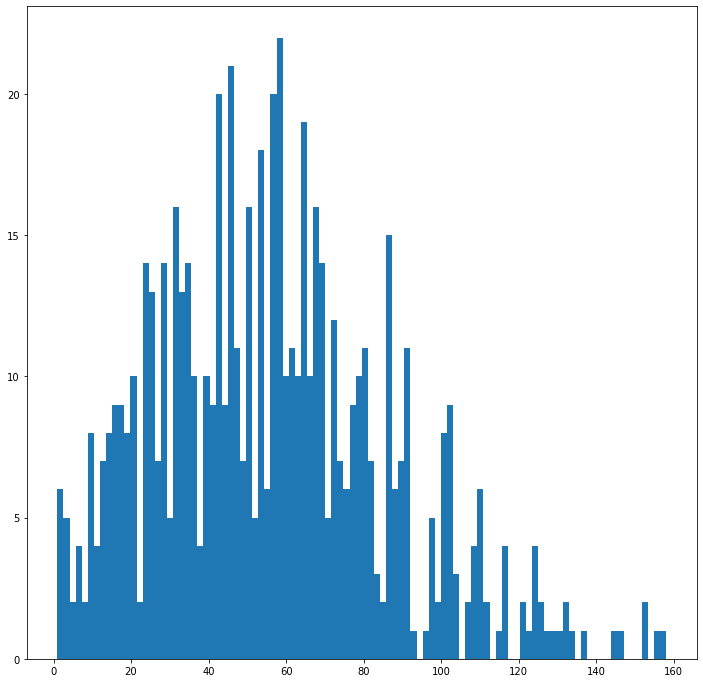

In [ ]:
#2월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_feb['time'],bins=100)

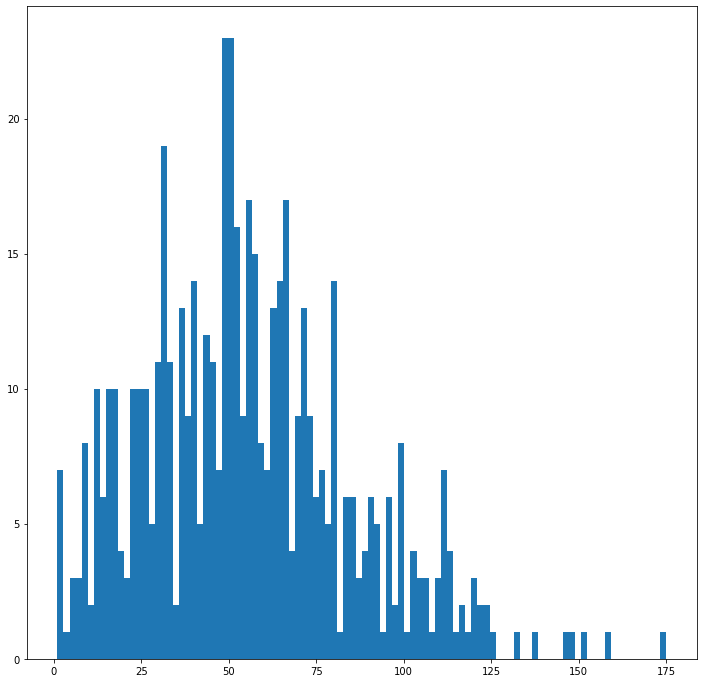

In [ ]:
#3월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_mar['time'],bins=100)

3개월 데이타 모두 정규분포가 아니므로, 비모수 검정인  kruskal-wallis test 사용

In [ ]:
from scipy.stats import kruskal

In [ ]:
service_jan, service_feb, service_mar = df_jan['time'], df_feb['time'], df_mar['time']

In [ ]:
print(kruskal(service_jan, service_feb, service_mar))

KruskalResult(statistic=2.4405305241085715, pvalue=0.2951518639493119)


P-value가 0.786으로 유의수준 0.05에 비해 월등히 크므로 귀무가설을 기각할 수 없다. >> Fail to reject H0 <br>
즉 1월, 2월, 3월달의 service time 분포가 모두 동일하다고 가정하고 세개의 데이터를 합산해서 service time의 분포를 추정할 수 있다.

# Step 2. Independence Check

시뮬레이션의 input data는 동일한 분포로 가정할 수 있는 서로 독립인 데이터일 때 이후의 통계적 분석이
가능하다. <br>
독립성을 확인하기 위하여 Heuristic procedure의 일환으로 1) Scatter-plot, 2) Correlation-plot을 이용한다. 

## Scatter diagram : Plot pairs (Xi, Xi+1)

### week1의 service time

In [ ]:
service_time = week1["time"][:-1].reset_index(drop=True) 
service_time_2 = week1["time"][1:].reset_index(drop=True)

In [ ]:
service_time.shape, service_time_2.shape

((529,), (529,))

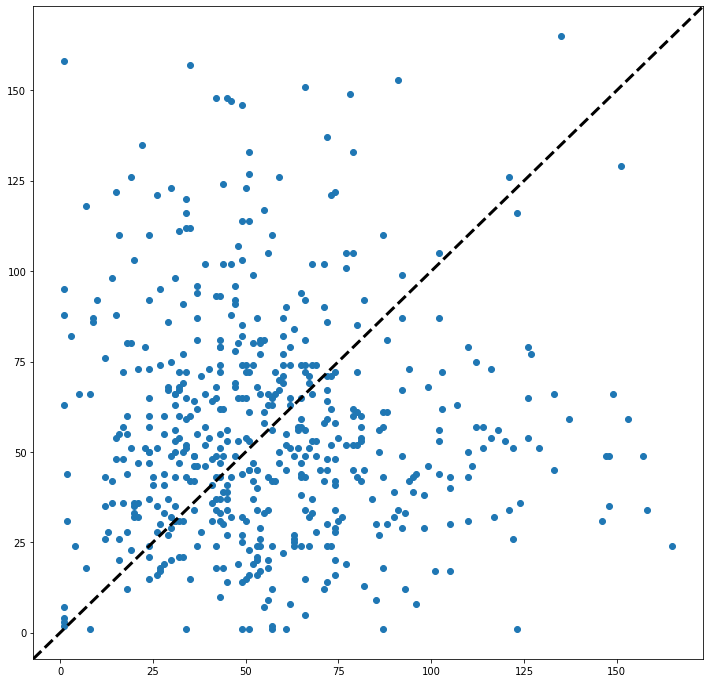

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (12,12))
ax.scatter(service_time,service_time_2)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

pair들이 random하게 퍼져있는 것을 보아, data가 independent하다는 것을 알 수 있다

### week2의 service time

In [ ]:
def scatter(df):
    service_time = df["time"][:-1].reset_index(drop=True) 
    service_time_2 = df["time"][1:].reset_index(drop=True)
    fig, ax = plt.subplots(1,1, figsize= (12,12))
    ax.scatter(service_time,service_time_2)
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

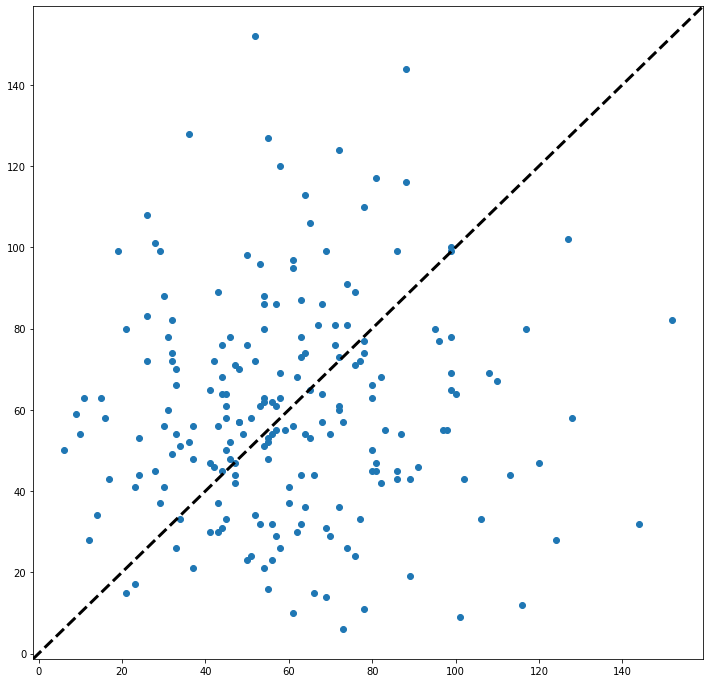

In [ ]:
scatter(week2)

### holiday의 service time

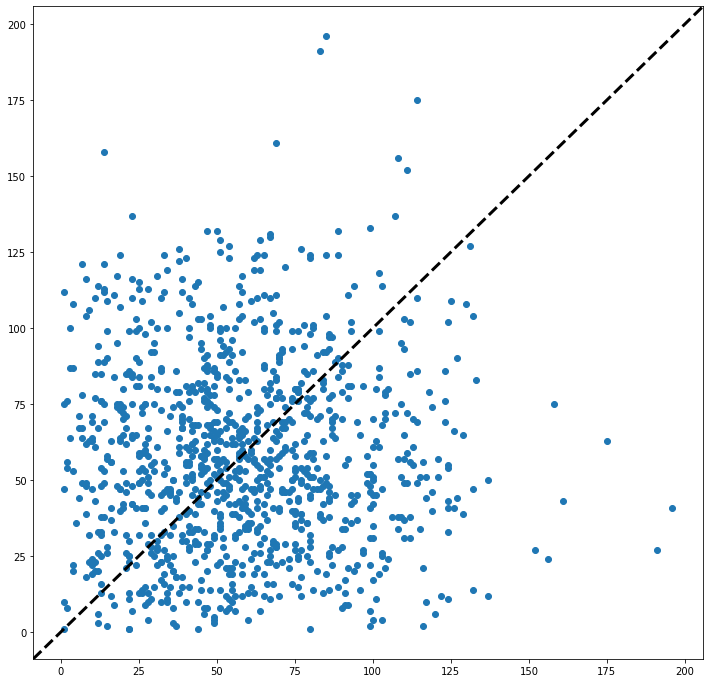

In [ ]:
scatter(hol)

## Correlation Plot

### week1

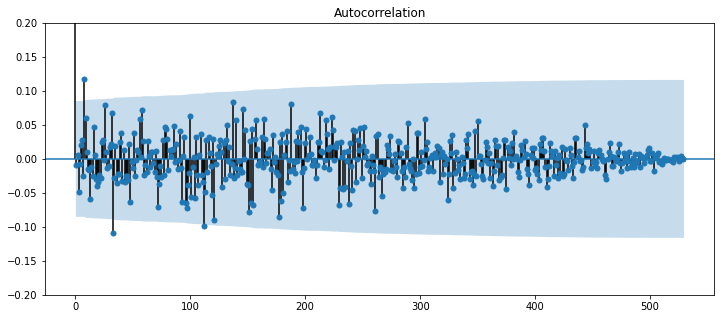

In [ ]:
import statsmodels.api as sm

figure, axes = plt.subplots(1,1,figsize= (12,5))
plt.ylim([-0.2,0.2])     
figure =sm.graphics.tsa.plot_acf(week1['time'],  use_vlines=True,lags=len(week1['time'])-1,ax=axes)
 

### week2

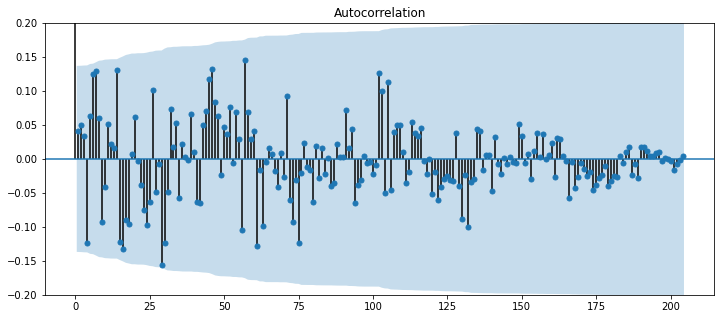

In [ ]:

figure, axes = plt.subplots(1,1,figsize= (12,5))
plt.ylim([-0.2,0.2])     
figure =sm.graphics.tsa.plot_acf(week2['time'],  use_vlines=True,lags=len(week2['time'])-1,ax=axes)
 

### holiday


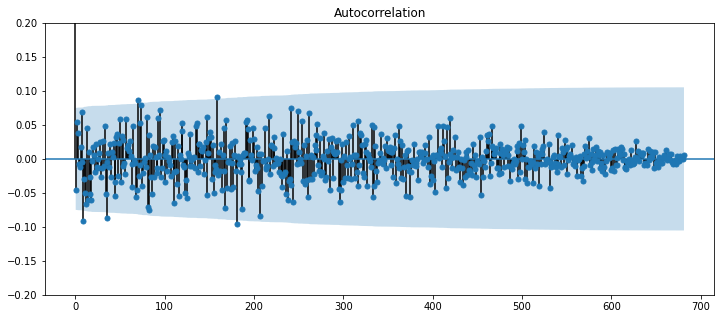

In [ ]:

figure, axes = plt.subplots(1,1,figsize= (12,5))
plt.ylim([-0.2,0.2])     
figure =sm.graphics.tsa.plot_acf(hol1['time'],  use_vlines=True,lags=len(hol1['time'])-1,ax=axes)
 

# Step 3.Distribution Families Estimation

##Boxplot


### 주중 1부

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43158356d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4315918e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4315835dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4315902690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43159023d0>],
 'means': []}

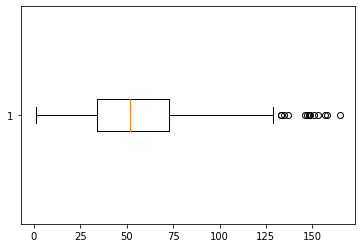

In [ ]:
plt.boxplot(week1['time'], vert=False)

In [ ]:
week1['time'].describe()

count    530.000000
mean      56.473585
std       31.256912
min        1.000000
25%       34.000000
50%       52.000000
75%       72.750000
max      165.000000
Name: time, dtype: float64

### 주중 2부

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43157aab90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43157b3650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43157aa5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43157ba150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43157ba690>],
 'means': []}

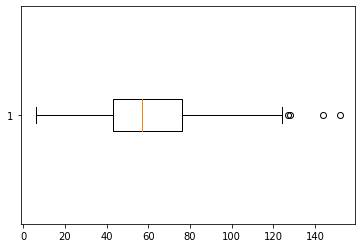

In [ ]:
plt.boxplot(week2['time'], vert=False)

In [ ]:
week2['time'].describe()

count    205.000000
mean      59.795122
std       26.787233
min        6.000000
25%       43.000000
50%       57.000000
75%       76.000000
max      152.000000
Name: time, dtype: float64

### 주말 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f43160c3a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f43160d0510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f43160c3490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f43160d0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f43160dc550>],
 'means': []}

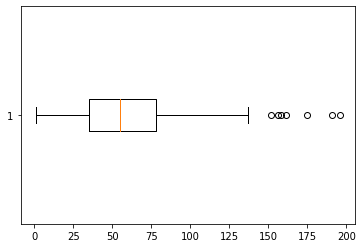

In [ ]:
plt.boxplot(hol['time'], vert=False)

In [ ]:
hol['time'].describe()

count    1063.000000
mean       58.054563
std        31.304122
min         1.000000
25%        35.000000
50%        55.000000
75%        78.000000
max       196.000000
Name: time, dtype: float64

# Step 4. Distribution Estimation

Fitting 106 distributions: 100%|██████████| 106/106 [03:01<00:00,  1.71s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.001247,1147.913604,-12070.141568,inf,0.029085,0.425824
mielke,0.001247,1147.913403,-12070.141238,inf,0.029085,0.425827
alpha,0.001259,1146.198415,-12068.059451,inf,0.031940,0.312812
invgamma,0.001262,1144.759693,-12066.037882,inf,0.034238,0.238272
f,0.001262,1146.760767,-12059.238602,inf,0.034236,0.238303


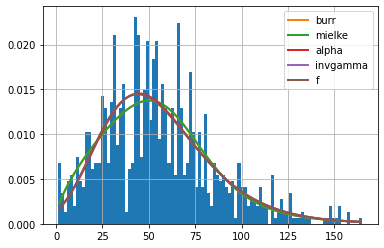

In [46]:
w=week['time'].values

f = Fitter(w,
           )
f.fit()
f.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.002810,1117.596200,-2274.228041,inf,0.035245,0.953033
lognorm,0.002849,1113.640654,-2276.744496,inf,0.042373,0.839822
gamma,0.002858,1112.759000,-2276.053137,inf,0.044863,0.786530
beta,0.002870,1114.276991,-2269.851202,inf,0.047439,0.727060
norm,0.002923,1145.278194,-2276.793039,inf,0.058487,0.467147


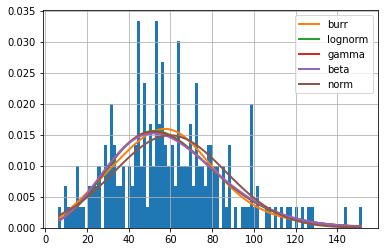

In [ ]:
f = Fitter(week2['time'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:25<00:00,  5.12s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.000340,1249.246171,-15868.781752,inf,0.025066,0.508303
beta,0.000363,1272.001527,-15801.223638,inf,0.038395,0.084843
lognorm,0.000370,1246.603786,-15787.668025,inf,0.028865,0.332207
gamma,0.000373,1242.494167,-15778.479736,inf,0.031246,0.245324
norm,0.000397,1367.162446,-15719.978811,inf,0.046321,0.020229


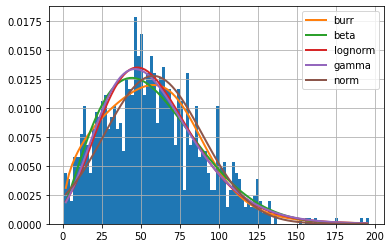

In [ ]:
f = Fitter(hol['time'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.get_best(method = 'sumsquare_error')
f.summary()

In [ ]:
f.fitted_param["burr"]

(6.403575282337522, 0.2176189235254901, 0.3928387307571638, 91.30048861580087)

In [ ]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 6.403575282337522,
  'd': 0.2176189235254901,
  'loc': 0.3928387307571638,
  'scale': 91.30048861580087}}

# arrival

In [76]:
len(week1)/len(week1['충전시작일자'].unique())/24

0.5496453900709221

In [77]:
len(week2)/len(week2['충전시작일자'].unique())/24

0.2455673758865248

In [78]:
len(hol1)/len(hol1['충전시작일자'].unique())/24

0.748015873015873

In [79]:
len(hol2)/len(hol2['충전시작일자'].unique())/24

0.2994186046511628

In [69]:
week2

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday,timezone
0,60,급속,50,33.45,2022.1.3,2022-01-03 21:25:00,2022.1.3 22:15,50,2022-01-03,1,2
1,61,급속,50,62.65,2022.1.3,2022-01-03 21:30:00,2022.1.3 22:49,78,2022-01-03,1,2
5,65,급속,50,15.40,2022.1.3,2022-01-03 18:48:00,2022.1.3 19:34,46,2022-01-03,1,2
6,66,급속,50,30.98,2022.1.3,2022-01-03 19:52:00,2022.1.3 21:10,78,2022-01-03,1,2
7,67,급속,50,39.30,2022.1.3,2022-01-03 19:14:00,2022.1.3 20:28,74,2022-01-03,1,2
...,...,...,...,...,...,...,...,...,...,...,...
888,1976,급속,50,34.66,2022.3.29,2022-03-29 00:14:00,2022.3.29 1:07,52,2022-03-29,1,2
891,1979,급속,50,22.61,2022.3.30,2022-03-30 18:15:00,2022.3.30 19:15,60,2022-03-30,1,2
894,1982,급속,50,14.15,2022.3.30,2022-03-30 19:38:00,2022.3.30 20:16,37,2022-03-30,1,2
895,1983,급속,50,6.55,2022.3.30,2022-03-30 18:55:00,2022.3.30 19:17,21,2022-03-30,1,2
